<a href="https://colab.research.google.com/github/ksujith/sujithkumarreddy_INFO5731_Spring2025/blob/main/Khristipati_Sujith_Assignment_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from **scratch instead of using any pre-existing libraries** to do so:

(1) Count the frequency of all the N-grams (N=3) and (N=2).

(2) Calculate the probabilities for all the bigrams in the dataset by using the formula  count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative
probabilities of each review in terms of other reviews (abstracts, or tweets) by using the formula  frequency (noun phrase) / max frequency (noun phrase) on the whole dataset.

Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
# Write your code here

import itertools
import collections
from nltk import ngrams
from nltk.tokenize import word_tokenize
import pandas as pd

# Read the CSV file
data = pd.read_csv('Antman_reviews_cleaned.csv')

reviews_array = []

# Tokenizing each review and filtering out empty lists
for review in data['cleaned_text']:
    reviews_array.append(word_tokenize(review))

cleaned_reviews = [tokens for tokens in reviews_array if tokens != []]
all_tokens = list(itertools.chain.from_iterable(cleaned_reviews))

# Trigrams
trigrams = list(ngrams(all_tokens, 3))
trigram_freq_dist = collections.Counter(trigrams)

# Printing trigram frequencies
for trigram, count in trigram_freq_dist.items():
    print(f"Trigram: {trigram}, Count: {count}")

# Bigrams
bigrams = list(ngrams(all_tokens, 3))
bigram_freq_dist = collections.Counter(bigrams)

# Printing bigram frequencies along with conditional probability
for bigram, count in bigram_freq_dist.items():
    # Calculate conditional probability for each bigram
    probability = count / all_tokens.count(bigram[0])
    print(f"Bigram: {bigram}, Count: {count}, Conditional Probability: {probability:.4f}")




Streaming output truncated to the last 5000 lines.
Bigram: ('escap', 'eyerollinduc', 'council'), Count: 139, Conditional Probability: 0.3333
Bigram: ('eyerollinduc', 'council', 'kang'), Count: 139, Conditional Probability: 1.0000
Bigram: ('council', 'kang', 'scene'), Count: 139, Conditional Probability: 1.0000
Bigram: ('kang', 'scene', 'also'), Count: 139, Conditional Probability: 0.0204
Bigram: ('scene', 'also', 'almost'), Count: 139, Conditional Probability: 0.1111
Bigram: ('also', 'almost', 'goofi'), Count: 139, Conditional Probability: 0.0526
Bigram: ('almost', 'goofi', 'menacingim'), Count: 139, Conditional Probability: 0.2000
Bigram: ('goofi', 'menacingim', 'hope'), Count: 139, Conditional Probability: 1.0000
Bigram: ('menacingim', 'hope', 'feig'), Count: 139, Conditional Probability: 1.0000
Bigram: ('hope', 'feig', 'right'), Count: 139, Conditional Probability: 0.0526
Bigram: ('feig', 'right', 'ship'), Count: 139, Conditional Probability: 0.5000
Bigram: ('right', 'ship', 'get'),

In [ ]:
# Bigrams
bigrams = list(ngrams(all_tokens, 2))
bigram_freq_dist = collections.Counter(bigrams)

# Printing bigram frequencies along with conditional probability
for bigram, count in bigram_freq_dist.items():
    # Calculate count of first word in the bigram
    w2_count = all_tokens.count(bigram[0])

    # Calculate conditional probability for each bigram
    if w2_count != 0:
        probability = count / w2_count
    else:
        probability = 0.0  # To handle cases where w2 does not appear in the dataset
    print(f"Bigram: {bigram}, Count: {count}, Conditional Probability: {probability:.4f}")

Bigram: ('huge', 'fan'), Count: 139, Conditional Probability: 0.1667
Bigram: ('fan', 'first'), Count: 139, Conditional Probability: 0.1111
Bigram: ('first', 'one'), Count: 139, Conditional Probability: 0.0370
Bigram: ('one', 'almost'), Count: 278, Conditional Probability: 0.0476
Bigram: ('almost', 'big'), Count: 139, Conditional Probability: 0.2000
Bigram: ('big', 'fan'), Count: 139, Conditional Probability: 0.0400
Bigram: ('fan', 'second'), Count: 139, Conditional Probability: 0.1111
Bigram: ('second', 'one'), Count: 278, Conditional Probability: 0.2000
Bigram: ('one', 'decid'), Count: 139, Conditional Probability: 0.0238
Bigram: ('decid', 'go'), Count: 139, Conditional Probability: 0.2500
Bigram: ('go', 'see'), Count: 278, Conditional Probability: 0.1000
Bigram: ('see', 'one'), Count: 278, Conditional Probability: 0.0645
Bigram: ('one', 'dx'), Count: 139, Conditional Probability: 0.0238
Bigram: ('dx', 'motion'), Count: 139, Conditional Probability: 1.0000
Bigram: ('motion', 'sensori'

In [ ]:
nltk.download('brown')
# Initialize variables for concatenated data, review labels, and count
concatenated_data = ''
review_labels = []
count = 1

# Read data from the Antman_reviews_cleaned.csv file
antman_data = pd.read_csv('Antman_reviews_cleaned.csv')

# Concatenate lemmatized reviews and create review labels for the first 100 reviews
for review in antman_data['cleaned_text'][:100]:
    concatenated_data += str(review)
    label = 'Review-' + str(count)
    review_labels.append(label)
    count += 1

# Import necessary libraries
from textblob import TextBlob
import pandas as pd

# Initialize lists for noun phrases and their frequencies
noun_phrases = []
frequencies = []

# Extract noun phrases and their frequencies from cleaned text for the first 100 reviews
for review in antman_data['cleaned_text'][:100]:
    blob = TextBlob(str(review))
    for noun_phrase in blob.noun_phrases:
        noun_phrases.append(noun_phrase)

# Calculate the frequency of each noun phrase in each review for the first 100 reviews
for phrase in noun_phrases:
    frequency_per_review = []
    for review in antman_data['cleaned_text'][:100]:
        denominator = concatenated_data.count(phrase)
        if denominator != 0:  # Check if denominator is not zero
            frequency_per_review.append(str(review).count(phrase) / denominator)
        else:
            frequency_per_review.append(0)  # If denominator is zero, set frequency to zero
    frequencies.append(frequency_per_review)

# Create a DataFrame with noun phrase frequencies for the first 100 reviews
noun_phrases_data = pd.DataFrame(frequencies).T
noun_phrases_data.columns = list(noun_phrases)
noun_phrases_data['Review_Label'] = review_labels

# Display the DataFrame
noun_phrases_data

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


,huge fan,big fan,dx motion sensori seat,nicest seat,visual motion sensori experi,looney tune stori,type stori part compliment mcu timelin thi liter,unnecessari movi date entir stori clich,cgi type interest stori,normal awesom hilari humor previou instal,...,sinc end season,loki thi film goingthroughthemot,dull certain moment howev effect end payton,trilog im,sure eventu time goe film slip,level mcu rank,mani interest scenario,new question thing,c mygrad imdb,Review_Label
0,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,0.25,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Review-1
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Review-2
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Review-3
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Review-4
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Review-5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Review-96
96,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Review-97
97,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Review-98
98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,Review-99


## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any **pre-existing libraries** to do so.

In [ ]:
import math
import pandas as pd

# Read data from CSV file
data = pd.read_csv('Antman_reviews_cleaned.csv')

# Extract text data from the CSV
reviews = data['cleaned_text'].values.tolist()

# Extracting unique words from all reviews
unique_words = set([word for review in reviews for word in str(review).split(" ")])

# Creating a DataFrame to store tf-idf values for each word in each review
tf_idf_matrix = pd.DataFrame(unique_words, columns=["words"])
review_count = 1

# Function to calculate tf-idf for a word in a given sentence
def calculate_tf_idf(x, sentence):
    value = sentence.count(x)
    size = len(sentence.split(" "))
    if value != 0:
        return (value / size) * (math.log(size / value, 10))
    else:
        return 0

# Calculating tf-idf values for each word in each review
for sentence in reviews:
    tf_idf_matrix["Review" + str(review_count)] = tf_idf_matrix["words"].apply(lambda x: calculate_tf_idf(x, str(sentence)))
    review_count += 1

# Displaying the tf-idf matrix
tf_idf_matrix

Streaming output truncated to the last 5000 lines.
<ipython-input-11-cbc9b77b5cb8>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_matrix["Review" + str(review_count)] = tf_idf_matrix["words"].apply(lambda x: calculate_tf_idf(x, str(sentence)))
<ipython-input-11-cbc9b77b5cb8>:28: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  tf_idf_matrix["Review" + str(review_count)] = tf_idf_matrix["words"].apply(lambda x: calculate_tf_idf(x, str(sentence)))
<ipython-input-11-cbc9b77b5cb8>:28: PerformanceWarning: DataFrame is highly f

,words,Review1,Review2,Review3,Review4,Review5,Review6,Review7,Review8,Review9,...,Review3466,Review3467,Review3468,Review3469,Review3470,Review3471,Review3472,Review3473,Review3474,Review3475
0,face,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.00000,...,0.0,0.000000,0.000000,0.006623,0.000000,0.000000,0.000000,0.0,0.009347,0.000000
1,purpo,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.00000,...,0.0,0.000000,0.000000,0.003696,0.000000,0.021078,0.000000,0.0,0.000000,0.000000
2,clean,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
3,outshadow,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.00000,...,0.0,0.000000,0.000000,0.000000,0.005444,0.000000,0.000000,0.0,0.000000,0.000000
4,ok,0.000000,0.029268,0.014824,0.031643,0.023674,0.02526,0.0,0.0,0.01009,...,0.0,0.015688,0.000000,0.014015,0.009671,0.021078,0.029636,0.0,0.016361,0.033482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1589,poor,0.000000,0.000000,0.000000,0.000000,0.013707,0.02526,0.0,0.0,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
1590,instead,0.020319,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.009347,0.000000
1591,strong,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.00000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.021078,0.017327,0.0,0.000000,0.000000
1592,janet,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.01009,...,0.0,0.000000,0.021166,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.011322


In [ ]:
import nltk
nltk.download('stopwords')






[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd
import random

# Read data from CSV file
data = pd.read_csv('Antman_reviews_cleaned.csv')

# Randomly select a review from the dataset
search_sentence = random.choice(data['cleaned_text'])

# Tokenizing and removing stopwords from the search sentence
X_list = word_tokenize(search_sentence)
stop_word = stopwords.words('english')
X_set = {i for i in X_list if not i in stop_word}

# Function to calculate cosine similarity
def cosine_similarity(X_set, Y_set):
    r_vector = X_set.union(Y_set)
    list1 = [1 if j in X_set else 0 for j in r_vector]
    list2 = [1 if j in Y_set else 0 for j in r_vector]
    try:
        similarity = sum(list1_i * list2_i for list1_i, list2_i in zip(list1, list2)) / float((sum(list1) * sum(list2)) ** 0.5)
    except ZeroDivisionError:
        similarity = 'None'
    return similarity

# Calculating cosine similarity for each review
cosine_similarities = []
for review in data['cleaned_text']:
    Y_list = word_tokenize(str(review))
    Y_set = {k for k in Y_list if not k in stop_word}
    similarity = cosine_similarity(X_set, Y_set)
    cosine_similarities.append(similarity)

# Creating a DataFrame with reviews and their cosine similarities
cosine_similarity_data = pd.DataFrame(list(zip(data['cleaned_text'], cosine_similarities)), columns=['reviews', 'cosine_similarity'])
cosine_similarity_data

,reviews,cosine_similarity
0,huge fan first one almost big fan second one d...,0.151685
1,entri phase pa without much set next big bad m...,0.191596
2,well happen mcu run ga last mcu film lacklust ...,0.217036
3,well ill start say wasnt bad movi wasnt great ...,0.124255
4,enjoy watch quantumania mostli solid fairli en...,1.000000
...,...,...
3470,thi film unspeak badit actual wor etern becau ...,0.151645
3471,fun onei terrif time watch antman wasp quantum...,0.122407
3472,mani point far heyday peak mcu movi anoth remi...,0.158735
3473,mcu current state absolut mess endgam whole se...,0.192621


## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit or Fine tune bert model).

(2) Visualize the word embedding model you created. (PCA and T-sne)

(3) Calculate the cosine similarity between a few pairs of words to see if the model captures semantic similarity accurately.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [ ]:
!pip install --upgrade gensim

# Importing necessary libraries
import gensim
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd

# Read data from CSV file
data = pd.read_csv('Antman_reviews_cleaned.csv')

# Preprocess the text data and split into tokens
docs = [review.split() for review in data['cleaned_text'] if pd.notnull(review)]

# Training Word2Vec model with a 300-dimensional vector size
word2vec_model = Word2Vec(docs, vector_size=300)

# Getting the list of words in the vocabulary
words = list(word2vec_model.wv.index_to_key)
print(words)

['movi', 'film', 'charact', 'mcu', 'like', 'antman', 'kang', 'one', 'even', 'marvel', 'time', 'get', 'phase', 'see', 'dont', 'realli', 'make', 'much', 'first', 'thing', 'major', 'big', 'watch', 'end', 'scott', 'could', 'care', 'quantum', 'think', 'villain', 'wasp', 'stori', 'good', 'thi', 'set', 'come', 'go', 'great', 'im', 'lot', 'realm', 'hope', 'still', 'also', 'didnt', 'moment', 'feel', 'new', 'doesnt', 'rudd', 'quantumania', 'say', 'better', 'place', 'peopl', 'act', 'cgi', 'work', 'look', 'play', 'actual', 'action', 'well', 'two', 'way', 'take', 'aveng', 'show', 'le', 'design', 'audienc', 'bad', 'level', 'interest', 'paul', 'want', 'role', 'seem', 'effect', 'bit', 'help', 'would', 'lang', 'strang', 'enjoy', 'made', 'best', 'visual', 'part', 'need', 'cant', 'screen', 'main', 'wasnt', 'comedi', 'someth', 'sinc', 'noth', 'bore', 'develop', 'endgam', 'everyth', 'pretti', 'begin', 'tri', 'point', 'next', 'second', 'expect', 'back', 'mayb', 'littl', 'know', 'third', 'wast', 'add', 'cass

In [ ]:
# Training Word2Vec model with a 300-dimensional vector size
word2vec_model = Word2Vec(docs, vector_size=300)

# Saving the Word2Vec model in binary format and as a whole model
word2vec_model.wv.save_word2vec_format('antman_word2vec_model.bin')
word2vec_model.save('antman_word2vec_model')

# Extracting word vectors and performing PCA for dimensionality reduction
word_vectors = word2vec_model.wv[word2vec_model.wv.index_to_key]
pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

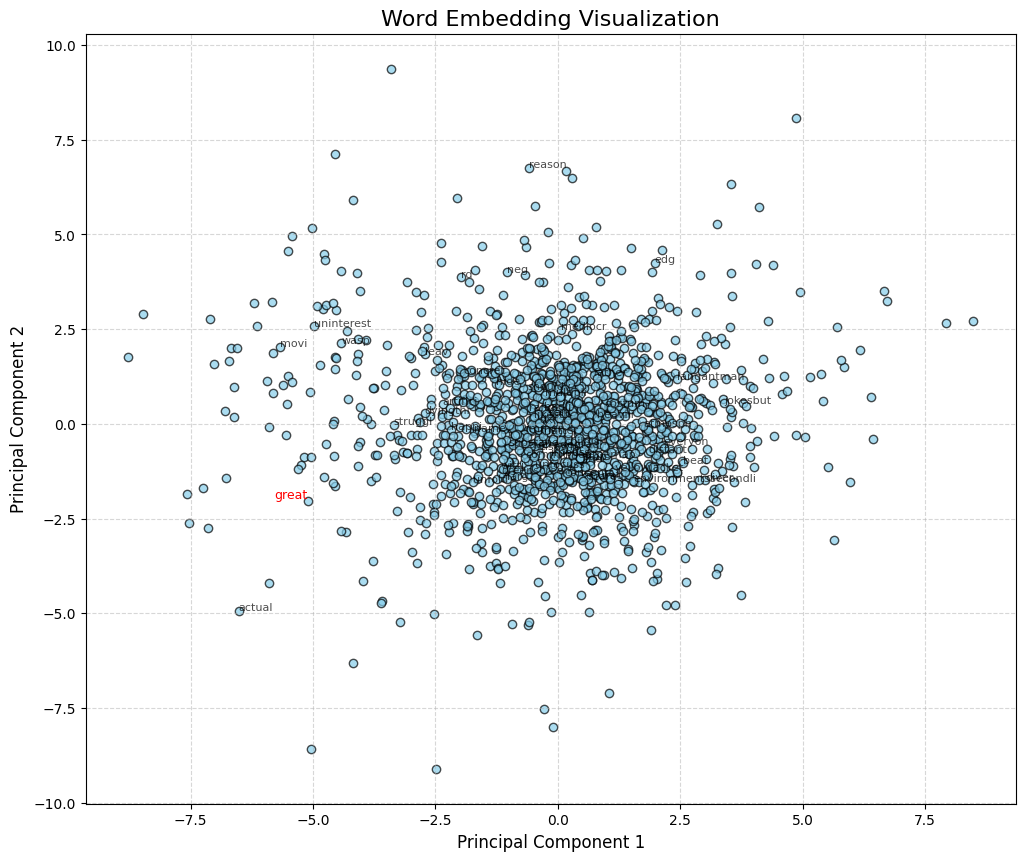

In [ ]:
# Creating a scatter plot of the word vectors with visual enhancements
plt.figure(figsize=(12, 10))
plt.scatter(result[:, 0], result[:, 1], color='skyblue', edgecolor='black', alpha=0.7)

# Annotating points with words, emphasizing a subset of words for better visibility
highlighted_words = ['great', 'interesting', 'exciting', 'positive', 'creative', 'Antman']
for i, word in enumerate(words):
    if word in highlighted_words:
        plt.annotate(word, xy=(result[i, 0], result[i, 1]), color='red', fontsize=9, ha='right', va='bottom')
    elif i % 30 == 0:  # Show every 30th word to avoid clutter
        plt.annotate(word, xy=(result[i, 0], result[i, 1]), fontsize=8, alpha=0.7)

# Adding a grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Adding a title and labels with a larger font size
plt.title('Word Embedding Visualization', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)

# Showing the plot
plt.show()

## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.




1.   Which NLP Task you would like perform on your selected dataset
(NER, Summarization, Sentiment Analysis, Text classficication)


  I would like to perform Summarization and Sentiment Analysis and Text Classification for this dataset
2.  Explain your labeling Schema you have used and mention those labels

Here,After performing extensive
text cleaning—
removing noise, digits, and stopwords, and
applying lowercasing, stemming, or lemmatization—
we assign each review one of three sentiment labels: Positive, Negative, or Neutral.
 Reviews with language that expresses enjoyment, praise, or enthusiasm (e.g., “loved,” “great”) are labeled Positive,

 while those dominated by criticism, dissatisfaction, or disappointment (e.g., “boring,” “terrible”) are labeled Negative.
 Reviews that mix sentiments or exhibit an indifferent tone are labeled Neutral.
 This is three-label approach streamlines classification and Sentiment Analysis enabling reviewers perceive each movie’s overall quality and appeal.

Labels Used: Positive, Negative, Neutral


3.  You can take AI assistance for labeling the data only.



In [ ]:
# The GitHub link of your final csv file


# Link:

https://github.com/ksujith/sujithkumarreddy_INFO5731_Spring2025/blob/main/Antman_reviews_annotated%20(1).csv

Which NLP Task you would like perform on your selected dataset (NER, Summarization, Sentiment Analysis, Text classficication)

Explain your labeling Schema you have used and mention those labels

You can take AI assistance for labeling the data only.

# Mandatory Question

Provide your thoughts on the assignment by filling this survey link. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

Annnotations part fell difficult but rest was easy to do!
